In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import tensorflow as tf
from tensorflow import *
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense , Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.1.0


**Reading data**

In [2]:
df=pd.read_csv(r'C:\Users\HP\Downloads\Questions.csv\Questions.csv',encoding='latin-1')
tag=pd.read_csv(r'C:\Users\HP\Downloads\Tags.csv (1)\Tags.csv',encoding='latin-1')

In [3]:
df.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...


In [4]:
tag.head()

,Id,Tag
0,469,python
1,469,osx
2,469,fonts
3,469,photoshop
4,502,python


In [5]:
df=df.merge(tag,on='Id')
df

,Id,OwnerUserId,CreationDate,Score,Title,Body,Tag
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,python
1,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,osx
2,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,fonts
3,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,photoshop
4,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...,python
...,...,...,...,...,...,...,...
1885069,40143338,7044980.0,2016-10-19T23:52:27Z,2,Most possible pairs,"<p>Given a list of values, and information on ...",python
1885070,40143365,4133131.0,2016-10-19T23:55:49Z,0,Theano operations returning odd results,<p>So I'm trying to learn how to use Theano an...,python
1885071,40143365,4133131.0,2016-10-19T23:55:49Z,0,Theano operations returning odd results,<p>So I'm trying to learn how to use Theano an...,numpy
1885072,40143365,4133131.0,2016-10-19T23:55:49Z,0,Theano operations returning odd results,<p>So I'm trying to learn how to use Theano an...,theano


In [6]:
df1=pd.DataFrame(data=df)
df1.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body,Tag
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,python
1,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,osx
2,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,fonts
3,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,photoshop
4,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...,python


**Data Analysis**

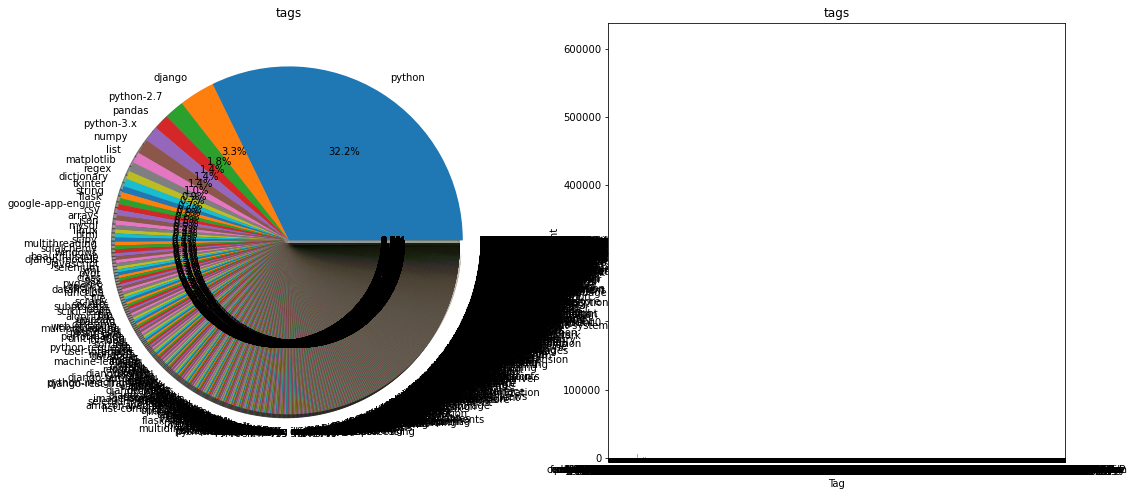

In [62]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

f, ax = plt.subplots(1, 2, figsize=(18, 8))
df1['Tag'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('tags')
ax[0].set_ylabel('')

sns.countplot('Tag', data=df1, ax=ax[1])
ax[1].set_title('tags')
plt.show()

**Data Preprocessing**

In [7]:
X = df1.iloc[:, :-1].values
Y = df1.iloc[:, -1].values
X,Y

(array([[469, 147.0, '2008-08-02T15:11:16Z', 21,
         'How can I find the full path to a font from its display name on a Mac?',
         "<p>I am using the Photoshop's javascript API to find the fonts in a given PSD.</p>\n\n<p>Given a font name returned by the API, I want to find the actual physical font file that that font name corresponds to on the disc.</p>\n\n<p>This is all happening in a python program running on OSX so I guess I'm looking for one of:</p>\n\n<ul>\n<li>Some Photoshop javascript</li>\n<li>A Python function</li>\n<li>An OSX API that I can call from python</li>\n</ul>\n"],
        [469, 147.0, '2008-08-02T15:11:16Z', 21,
         'How can I find the full path to a font from its display name on a Mac?',
         "<p>I am using the Photoshop's javascript API to find the fonts in a given PSD.</p>\n\n<p>Given a font name returned by the API, I want to find the actual physical font file that that font name corresponds to on the disc.</p>\n\n<p>This is all happening in 

In [8]:
labelencoder_X = LabelEncoder()
X[:,2] = labelencoder_X.fit_transform(X[:,2])
X[:,3] = labelencoder_X.fit_transform(X[:,3])
X[:,4] = labelencoder_X.fit_transform(X[:,4])
X[:,5] = labelencoder_X.fit_transform(X[:,5])

print(X)
tf.feature_column.categorical_column_with_vocabulary_list( 
    key='partial_funding_indicator', vocabulary_list=['True', 'False'],
    dtype=tf.string, num_oov_buckets=None)

array([[469, 147.0, 0, 41, 146514, 145311],
       [469, 147.0, 0, 41, 146514, 145311],
       [469, 147.0, 0, 41, 146514, 145311],
       ...,
       [40143365, 4133131.0, 606067, 20, 448986, 521555],
       [40143365, 4133131.0, 606067, 20, 448986, 521555],
       [40143365, 4133131.0, 606067, 20, 448986, 521555]], dtype=object)


VocabularyListCategoricalColumn(key='partial_funding_indicator', vocabulary_list=('True', 'False'), dtype=tf.string, default_value=-1, num_oov_buckets=None)

In [10]:
labelencoder_Y = LabelEncoder()
Y= labelencoder_Y.fit_transform(Y.astype(str))
print(Y)

array([ 1919,   378, 11527, ..., 16755,  5439, 16528], dtype=int64)


In [18]:
from sklearn import preprocessing

# convert X into dataframe
X_pd = pd.DataFrame(data=X)
# replace all instances of URC with 0 
X_replace = X_pd.replace(':',0, regex=True)
# convert it back to numpy array
X_np = X_replace.values
# set the object type as float
dX = X_np.astype(float)

X_pd = pd.DataFrame(data=Y)
# replace all instances of URC with 0 
X_replace = X_pd.replace(':',0, regex=True)
# convert it back to numpy array
X_np = X_replace.values
# set the object type as float
fX = X_np.astype(float)

**Splitting data into training and testing**

In [19]:
X_train,X_test,y_train,y_test=train_test_split(dX,fX,test_size=0.2,random_state=10)

In [20]:
X_train.shape,y_train.shape
X_train

array([[8.5423430e+06, 7.2924100e+05, 8.0090000e+04, 4.4000000e+01,
        2.9070700e+05, 4.7162600e+05],
       [2.3260220e+07, 1.4601440e+06, 2.7042600e+05, 2.2000000e+01,
        7.2476000e+04, 4.0090900e+05],
       [1.7621609e+07, 2.5773560e+06, 1.8733700e+05, 2.0000000e+01,
        3.8048100e+05, 3.8614700e+05],
       ...,
       [2.7652804e+07, 2.8154500e+05, 3.4167300e+05, 2.0000000e+01,
        3.7717400e+05, 5.6309900e+05],
       [3.9192171e+07, 6.7671100e+06, 5.8225200e+05, 1.9000000e+01,
        4.1950400e+05, 9.0122000e+04],
       [3.3448962e+07, 2.2279750e+06, 4.5167700e+05, 2.0000000e+01,
        3.6885200e+05, 4.9331800e+05]])

**CNN Model**

In [22]:
model=Sequential()

model.add(Dense(10,activation='relu'))

model.add(Dense(10,activation='relu'))
model.add(Dense(1))

model.add(Flatten())

**compiling model**

In [23]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

**Training model**

In [63]:
history = model.fit(X_train, y_train, nb_epoch=25, validation_data=(X_test, y_test), shuffle=True)

Train on 1508059 samples, validate on 377015 samples
Epoch 1/25
1508059/1508059 [==============================] - 100s 66us/sample - loss: nan - accuracy: 6.6310e-06 - val_loss: nan - val_accuracy: 7.9572e-06
Epoch 2/25
1508059/1508059 [==============================] - 98s 65us/sample - loss: nan - accuracy: 6.6310e-06 - val_loss: nan - val_accuracy: 7.9572e-06
Epoch 3/25
1508059/1508059 [==============================] - 93s 62us/sample - loss: nan - accuracy: 6.6310e-06 - val_loss: nan - val_accuracy: 7.9572e-06
Epoch 4/25
1508059/1508059 [==============================] - 93s 62us/sample - loss: nan - accuracy: 6.6310e-06 - val_loss: nan - val_accuracy: 7.9572e-06
Epoch 5/25
1508059/1508059 [==============================] - 87s 58us/sample - loss: nan - accuracy: 6.6310e-06 - val_loss: nan - val_accuracy: 7.9572e-06
Epoch 6/25
1508059/1508059 [==============================] - 101s 67us/sample - loss: nan - accuracy: 6.6310e-06 - val_loss: nan - val_accuracy: 7.9572e-06
Epoch 7/2

**PREDICTION AND SCORE**

In [64]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

Accuracy on training data: 6.631040378124453e-06% 
 Error on training data: 0.9999933689596219
Accuracy on test data: 7.957242814882193e-06% 
 Error on test data: 0.9999920427571851
